In [1]:
from importlib import reload

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

# from cam_class_optimization import CamGeneration
import cam_class_optimization
from cam_class_optimization import CamGeneration

# Define problem parameters. Forces are in Newtons, lengths are in meters.
angle_data = 'data/Knee-angle_Chugo_2006.csv'
stroke = 0.1
sit_angle_deg = 220
target_force_max = 175
target_force_range = 50
target_percentage_max = 32.5
target_percentage_range = 5
target_sitting_max = 40
target_radius_max = 0.0635

In [2]:
def generate_cam(x, plot=False, index=0):
    """ Generates a cam from the given gear ratios, input angles, and scaling.
    """
    gear_ratios = x[: 8]
    input_angles = x[8 : -1]
    scaling = x[-1]

    Cam = CamGeneration(gear_ratios, input_angles, scaling,
                        sit_angle=np.pi/180*sit_angle_deg)
    pts_inner, pts_outer, radius_max = Cam.calculate_cam_radii(stroke=stroke,
                                                               plot=plot,
                                                               index=index)
    if np.any(np.isnan(pts_inner)) or np.any(np.isinf(pts_inner)):
        return np.inf, np.inf, 0, np.inf
    forces, percentages = Cam.calc_forces_percentages(angle_data,
                                                      torque=False,
                                                      stroke=stroke,
                                                      plot=plot,
                                                      index=index)
    force_max = max(forces)
    if not np.isnan(force_max):
        perc_force_max = percentages[np.where(forces == force_max)[0][0]]
        perc_sitting_ind = np.where(np.round(percentages, 1) == 0)[0][0]
        force_sitting = forces[perc_sitting_ind]
        return radius_max, perc_force_max, force_max, force_sitting
    else:
        return np.inf, np.inf, 0, np.inf

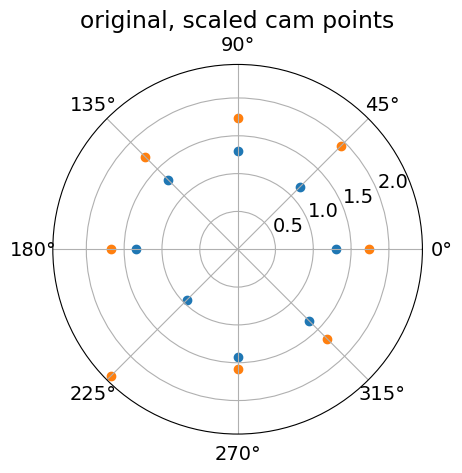

foo


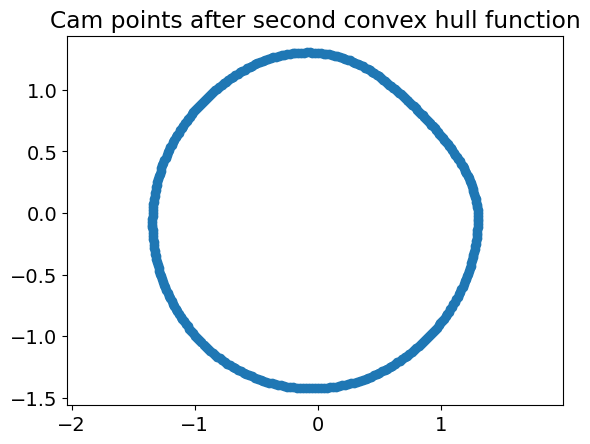

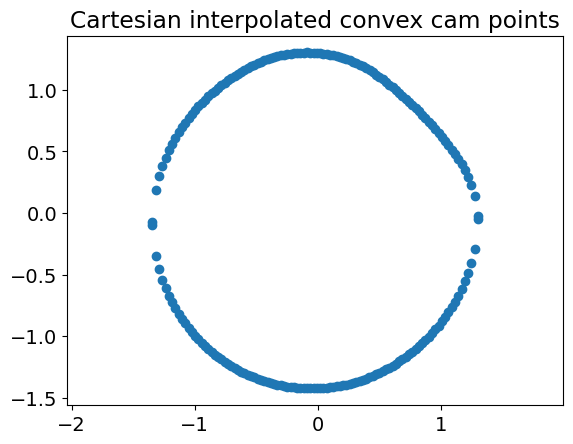

foo


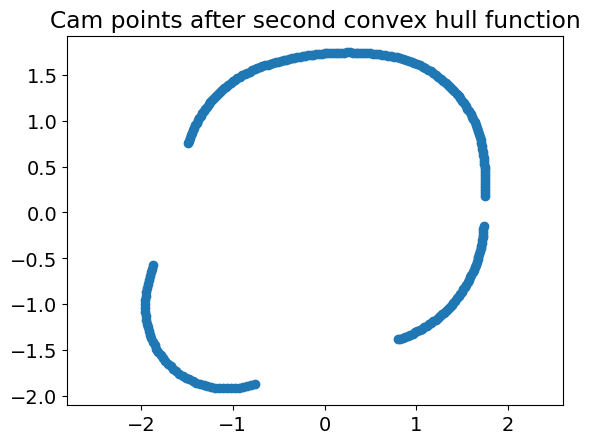

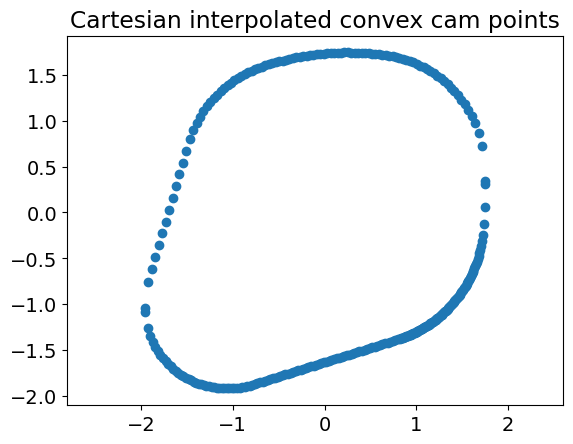

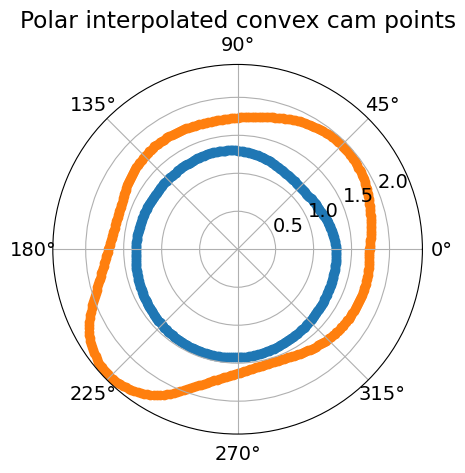

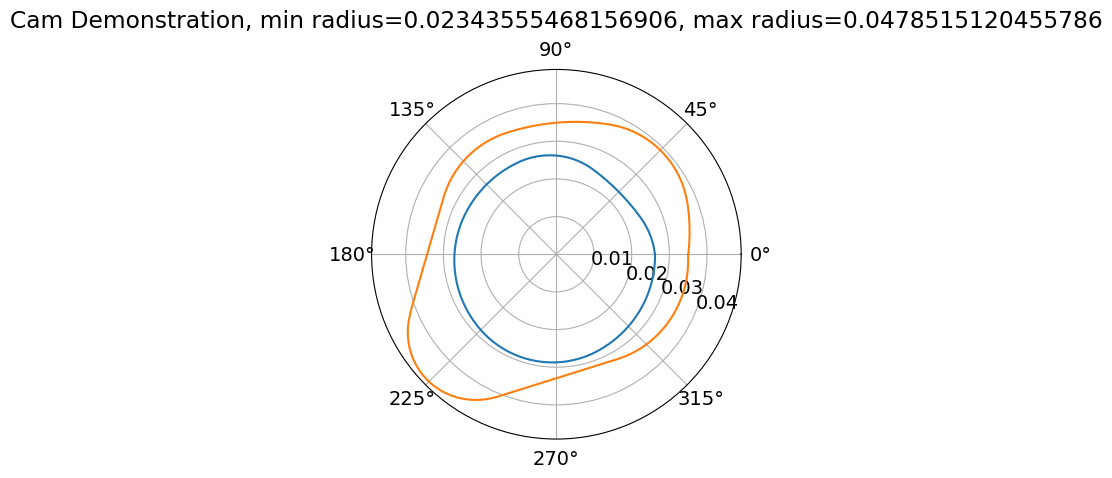

<Figure size 640x480 with 0 Axes>

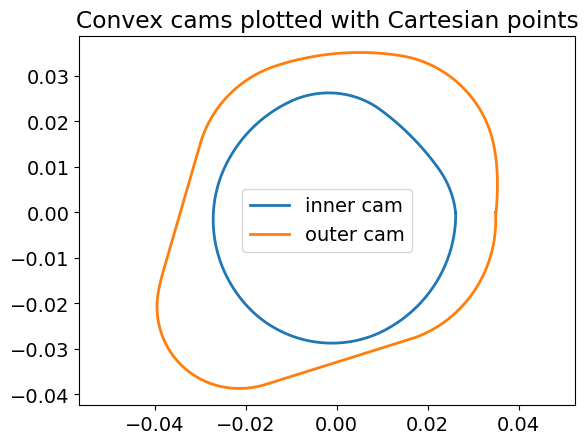

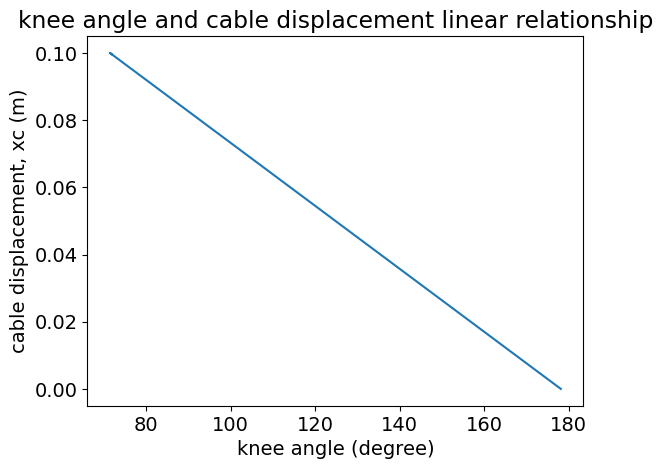

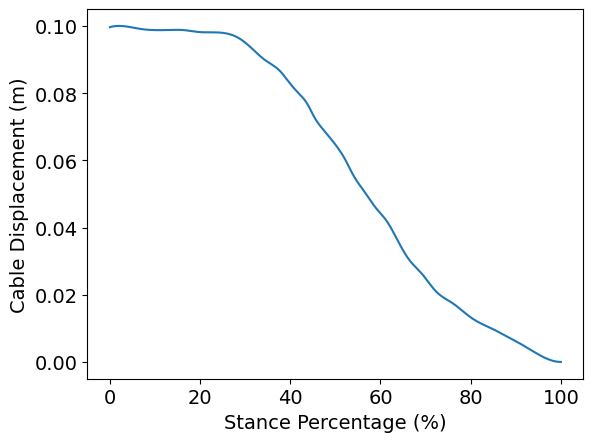

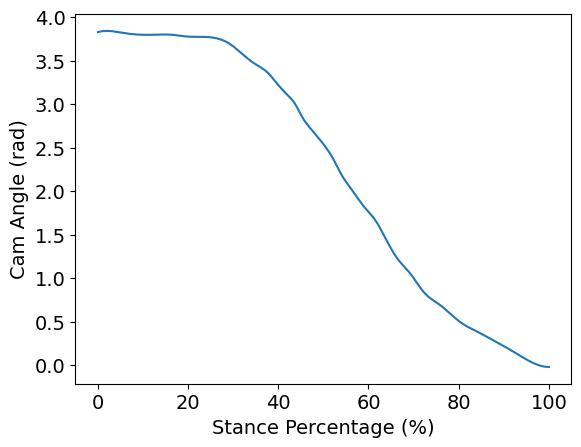

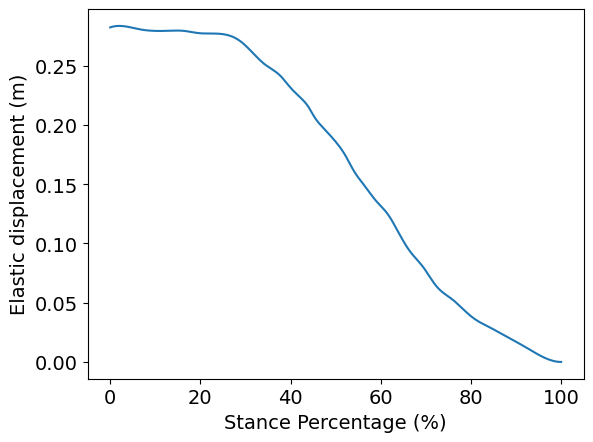

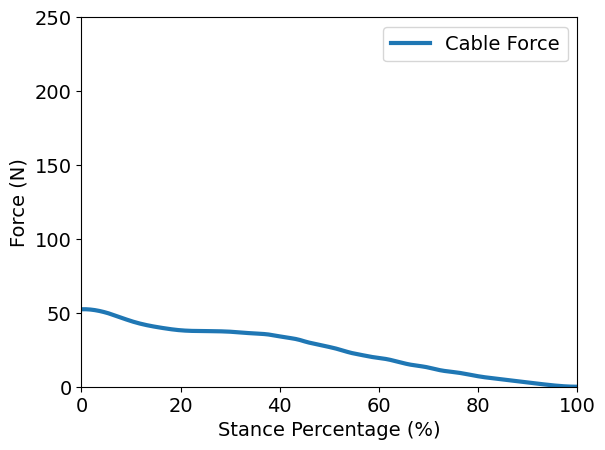

max force of 52.425636521567405  at  0.45454545454545453  %
max radii =  0.0478515120455786
sitting force = 52.39230589297255
TOTAL ERROR =  207.05997542890526


In [4]:
# Reload the cam_class_optimization module to get the latest version of the code.
# (Useful while editing the other file)
reload(cam_class_optimization)
from cam_class_optimization import CamGeneration

# Define cam parameters
gear_ratios = np.array([0.75, 0.6, 0.75, 0.75, 0.8, 0.4, 0.9, 0.8])
input_angles = np.array([0, np.pi/4, np.pi/2, 3*np.pi/4, np.pi, 5*np.pi/4, 3*np.pi/2, 7*np.pi/4])
scaling = np.array([1.5])

x = np.append(np.append(gear_ratios, input_angles), scaling)

radius_max, perc_force_max, force_max, force_sitting = generate_cam(x, plot=True)
error_total = (radius_max
                + abs(perc_force_max - target_percentage_max)
                + abs(force_max - target_force_max)
                + abs(force_sitting)
                )

print('max force of', force_max,' at ',perc_force_max, ' %')
print('max radii = ',radius_max)
print(f'sitting force = {force_sitting}')
# print(f'Max radius = {radius_max}, max_force_perc - 32.5 = {perc_force_max}, \
#         max_force_diff = {F[ind][2]}, sitting_force = {F[ind][3]}')
print('TOTAL ERROR = ', error_total)